二分类模型效果的评价指标主要有TP、TN、FP、FN、混淆矩阵、准确率、精确率、召回率、F1-score、分类报告

# TP、TN、FP、FN的介绍

## 基本概念

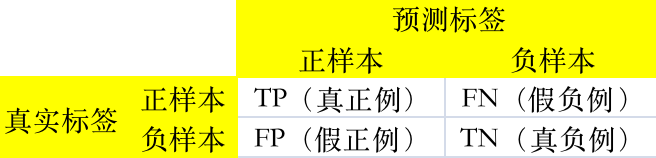

In [64]:
# TP、TN、FP、FN图像展示
from IPython.display import Image
Image(filename='./pcitures/raw_pics/C07 二分类模型评价指标——TP、TN、FP、FN、准确率、精确率、召回率、F1-score、混淆矩阵、分类报告.png', width=600, height=400)

- TP(True Positive):实际为正样本，预测为正样本

- TN(True Negative):实际为负样本，预测为负样本

- FP(False Positive):实际为负样本，预测为正样本

- FN(False Negative):实际为正样本，预测为负样本

**小结**
- **a.** T和F代表预测是否正确(T代表预测正确，F代表预测错误)

- **b.** P和N则代表预测的结果，P代表预测为正例，N代表预测为负例

## TP、TN、FP、FN手算案例

假设我们有 10 个样本，其真实标签（实际值）和预测标签如下

| 样本id | 真实标签 (Actual) | 预测标签 (Predicted) |
|------|--------------------|----------------------|
| 1    | 1                  | 1                    |
| 2    | 1                  | 0                    |
| 3    | 1                  | 1                    |
| 4    | 0                  | 1                    |
| 5    | 0                  | 0                    |
| 6    | 0                  | 0                    |
| 7    | 1                  | 1                    |
| 8    | 1                  | 0                    |
| 9    | 0                  | 1                    |
| 10   | 0                  | 0                    |

- **TP (True Positive)**：
    - 真实为正类（1）且预测为正类（1）的样本。
    - 真实标签为 1，预测标签也为 1 的样本id有：1、3、7。
    - 所以，TP = 3。

- **TN (True Negative)**：
    - 真实为负类（0）且预测为负类（0）的样本。
    - 真实标签为 0，预测标签也为 0 的样本有id：5、6、10。
    - 所以，TN = 3。

- **FP (False Positive)**：
    - 真实为负类（0），但预测为正类（1）的样本。
    - 真实标签为 0，预测标签为 1 的样本有id：4、9。
    - 所以，FP = 2。

- **FN (False Negative)**：
    - 真实为正类（1），但预测为负类（0）的样本。
    - 真实标签为 1，预测标签为 0 的样本有id：2、8。
    - 所以，FN = 2。

**总结一下**：

| 指标 | 数量 |
|------|------|
| **TP** | 3 |
| **TN** | 3 |
| **FP** | 2 |
| **FN** | 2 |

# 混淆矩阵

## 基本概念

**混淆矩阵（Confusion Matrix）**是一个表格，用于评估分类模型的效果，其中列出了模型预测结果和实际标签的对比情况。
- True Positives (TP)：真正例，即模型预测为正例且实际为正例的样本数。
- True Negatives (TN)：真反例，即模型预测为负例且实际为负例的样本数。
- False Positives (FP)：假正例，即模型预测为正例但实际为负例的样本数。
- False Negatives (FN)：假反例，即模型预测为负例但实际为正例的样本数。
|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | TP (True Positive) | FN (False Negative) |
| **Actual Negative** | FP (False Positive) | TN (True Negative) |

## 混淆矩阵手算案例

沿用1.2节案例，已经计算得到

| 指标 | 数量 |
|------|------|
| **TP** | 3 |
| **TN** | 3 |
| **FP** | 2 |
| **FN** | 2 |

因此混淆矩阵为：

|                | Predicted Positive | Predicted Negative |
|----------------|--------------------|--------------------|
| **Actual Positive** | 3 (TP)            | 2 (FN)            |
| **Actual Negative** | 2 (FP)            | 3 (TN)            |

## sklearn计算混淆矩阵

### confusion_matrix
- `y_true`: 真实标签。
- `y_pred`: 模型预测结果。
- `labels`: 指定混淆矩阵中的类别顺序。

### 实际案例与混淆矩阵可视化

**titanic 数据集**包含了 891 条乘客记录，每条记录描述了乘客的个人信息及其在 Titanic 号上的生存情况
- survived：生存情况（0 = 未生还, 1 = 生还）
- pclass：乘客舱等级（1 = 一等舱, 2 = 二等舱, 3 = 三等舱）
- sex：乘客性别（male = 男性, female = 女性）
- age：乘客年龄（float，部分缺失值）
- sibsp：乘客在船上的兄弟姐妹或配偶数量（整数）
- parch：乘客在船上的父母或子女数量（整数）
- fare：乘客支付的票价（float）
- embarked：乘客登船港口（C = 瑟堡, Q = 皇后镇, S = 南安普敦）
- class：舱等级（文本版本的 pclass，First = 头等舱, Second = 二等舱, Third = 三等舱）
- who：乘客身份（man = 成年男性, woman = 成年女性, child = 儿童）
- adult_male：是否为成年男性（True = 是, False = 否）
- deck：乘客所在的甲板（A, B, C, D, E, F, G，部分缺失值较多）
- embark_town：乘客登船的城市（Cherbourg = 瑟堡, Queenstown = 皇后镇, Southampton = 南安普敦）
- alone：是否独自旅行（True = 独自旅行，False = 有亲属同行，对应 sibsp + parch == 0）

Confusion Matrix:
[[92 13]
 [19 55]]


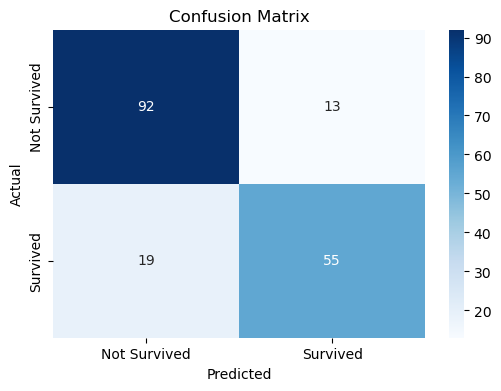

In [66]:
# 导入所需的库
import seaborn as sns  # 用于加载内置数据集
import matplotlib.pyplot as plt # 导入绘图的包
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix  # 导入计算准确率、精确率、召回率、F1-score 和混淆矩阵的函数

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 选择特征列（X）和目标列（y）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()  # 删除任何包含缺失值的行
y = df['survived']  # 目标变量，是否生还

# 数据集划分：80%作为训练集，20%作为验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练一个随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators表示使用100个决策树
model.fit(X_train, y_train)  # 训练模型

# 使用训练好的模型对测试集进行预测
y_pred = model.predict(X_test)

# 计算并打印混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)  # 计算混淆矩阵
print("Confusion Matrix:")
print(conf_matrix)

# 可视化混淆矩阵
plt.figure(figsize=(6, 4))  # 设置画布大小
sns.heatmap(
    conf_matrix,              # 输入的矩阵数据，通常是混淆矩阵
    annot=True,               # 在每个格子内显示数据值
    fmt=".0f",                  # 格式化显示的数值类型，".0f" 表示以整数格式显示
    cmap="Blues",             # 设置颜色映射，"Blues" 是一种蓝色渐变的配色方案
    xticklabels=["Not Survived", "Survived"],  # 设置 x 轴的标签，即预测类别
    yticklabels=["Not Survived", "Survived"]   # 设置 y 轴的标签，即真实类别
)

# 设置图形标题和标签
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()  # 显示图形

# 准确率（Accuracy）

## 基本概念

**准确率(Accuracy)**是指所有正确预测的样本数量占总样本数量的比例。公式为：$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}$$
其中，
- TP（True Positives）是真正例，也即真实为正类且预测为正类的样本数。
- TN（True Negatives）是真负例，也即真实为负类且预测为负类的样本数。
- FP（False Positives）是假正例，也即真实为负类但预测为正类的样本数。
- FN（False Negatives）是假负例，也即真实为正类但预测为负类的样本数。

因此，
- TP + TN：正确预测的样本数，包括正类和负类。
- TP + TN + FP + FN：所有样本的总数。

## 准确率手算案例

沿用1.2节案例，已经计算得到

| 指标 | 数量 |
|------|------|
| **TP** | 3 |
| **TN** | 3 |
| **FP** | 2 |
| **FN** | 2 |

因此

$$\text{Accuracy} = \frac{\text{TP} + \text{TN}}{\text{TP} + \text{TN} + \text{FP} + \text{FN}}=\frac{3 + 3}{3 + 3 + 2 + 2} = \frac{6}{10} = 0.6$$

## sklearn计算准确率

### accuracy_score
- `y_true`: 真实标签。
- `y_pred`: 模型预测结果。

### 实际案例

In [67]:
# 导入所需的库
import seaborn as sns  # 用于加载内置数据集
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.metrics import accuracy_score  # 用于计算准确率

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 选择特征列（X）和目标列（y）
# 特征列： 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked'
# 目标列： 'survived'（表示乘客是否幸存，0表示未幸存，1表示幸存）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()  # 删除任何包含缺失值的行
y = df['survived']  # 目标变量，是否生还

# 数据集划分：80%作为训练集，20%作为验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练一个随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators表示使用100个决策树
model.fit(X_train, y_train)  # 训练模型

# 使用训练好的模型对验证集进行预测
y_pred = model.predict(X_test)

# 计算并打印模型在验证集上的准确率
accuracy = accuracy_score(y_test, y_pred)  # 计算准确率
print(f"Accuracy: {accuracy:.4f}")  # 输出准确率，保留四位小数

Accuracy: 0.8212


# 精确率（Precision）

## 基本概念

精确率（Precision）是指真正例占所有被预测为正例的样本数量的比例，关注的是**正类预测的准确性**。公式为：$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}$$

其中，
- TP（True Positives）是真正例，也即真实为正类且预测为正类的样本数。
- FP（False Positives）是假正例，也即真实为负类但预测为正类的样本数。

因此，
- TP：真实为正类且预测为正类的样本数
- TP + FP：预测为正类的样本数。

## 精确率手算案例

沿用1.2节案例，已经计算得到

| 指标 | 数量 |
|------|------|
| **TP** | 3 |
| **TN** | 3 |
| **FP** | 2 |
| **FN** | 2 |

因此

$$\text{Precision} = \frac{\text{TP}}{\text{TP} + \text{FP}}=\frac{3}{3 + 2} = \frac{3}{5} = 0.6$$

## sklearn计算精确率

### precision_score
- `y_true`: 真实标签。
- `y_pred`: 模型预测结果。
- `pos_label`: 指定正类标签。
- `average`: 精确率汇总方式：
    - `None`：返回每个类别的精确率
    - `binary`：适用于二分类问题，计算正类（pos_label）的精确率。
    - `micro`：计算全局微观精确率（即把所有类别的 TP 和 FP 加起来计算）。
    - `macro`：计算各类别的精确率，并返回它们的简单平均值（不考虑类别的支持度）。
    - `weighted`：计算各类别的精确率，并根据每个类别的样本数加权平均。

### 实际案例

In [68]:
# 导入所需的库
import numpy as np
import pandas as pd
import seaborn as sns  # 用于加载内置数据集
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.metrics import accuracy_score, precision_score  # 用于计算准确率和精确率

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 选择特征列（X）和目标列（y）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()  # 删除任何包含缺失值的行
y = df['survived']  # 目标变量，是否生还

# 数据集划分：80%作为训练集，20%作为验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练一个随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators表示使用100个决策树
model.fit(X_train, y_train)  # 训练模型

# 使用训练好的模型对验证集进行预测
y_pred = model.predict(X_test)

# 计算并打印模型在验证集上的准确率
accuracy = accuracy_score(y_test, y_pred)  # 计算准确率
print(f"Accuracy: {accuracy:.4f}")  # 输出准确率，保留四位小数

# 计算并打印模型在验证集上的精确率
precision = precision_score(y_test, y_pred)  # 计算精确率，默认average='binary'
print(f"Precision: {precision:.4f}")  # 输出精确率，保留四位小数

Accuracy: 0.8212
Precision: 0.8088


### `average`精确率汇总方式介绍

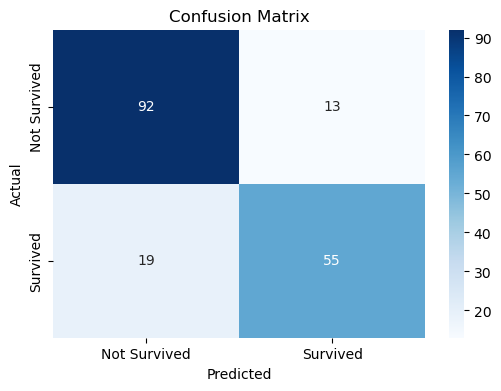

In [69]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)  # 计算混淆矩阵

# 可视化混淆矩阵
plt.figure(figsize=(6, 4))  # 设置画布大小
sns.heatmap(
    conf_matrix,              # 输入的矩阵数据，通常是混淆矩阵
    annot=True,               # 在每个格子内显示数据值
    fmt=".0f",                  # 格式化显示的数值类型，".0f" 表示以整数格式显示
    cmap="Blues",             # 设置颜色映射，"Blues" 是一种蓝色渐变的配色方案
    xticklabels=["Not Survived", "Survived"],  # 设置 x 轴的标签，即预测类别
    yticklabels=["Not Survived", "Survived"]   # 设置 y 轴的标签，即真实类别
)

# 设置图形标题和标签
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()  # 显示图形

#### `None`：返回每个类别的精确率

In [72]:
# 分别返回类别0、类别1的精确率
precision_score(y_test, y_pred, average=None) 

array([0.82882883, 0.80882353])

In [73]:
# 类别0的精确率，此时认为类别0为正类：TP_0=92，FP_0=19
92/(92+19)

0.8288288288288288

In [74]:
# 类别1的精确率，此时认为类别1为正类:TP_1=55，FP_1=13
55/(55+13)

0.8088235294117647

#### `binary`：适用于二分类问题，计算正类（pos_label）的精确率

In [75]:
# 默认类别1为正类，因此返回类别1的精确率
precision_score(y_test, y_pred, average='binary') 

0.8088235294117647

#### `micro`：计算全局微观精确率（即把所有类别的 TP 和 FP 加起来计算）

In [76]:
# 全局微观精确率
precision_score(y_test, y_pred, average='micro')

0.8212290502793296

In [77]:
# 全局精确率，即把所有类别的 TP 和 FP 加起来计算：（TP_0+TP_1）/(TP_0+TP_1+FP_0+FP_1)
(92+55)/(92+55+19+13)

0.8212290502793296

#### `macro`：计算各类别的精确率，并返回它们的简单平均值（不考虑类别的支持度）

In [78]:
# 全局宏观精确率
precision_score(y_test, y_pred, average='macro') 

0.8188261791202968

In [79]:
# 计算各类别精确率的平均值
np.mean([0.82882883, 0.80882353])

0.81882618

#### `weighted`：计算各类别的精确率，并根据每个类别的样本数加权平均

In [80]:
# 全局加权精确率
precision_score(y_test, y_pred, average='weighted') 

0.8205584815837855

In [81]:
# 统计各类别的样本数
pd.DataFrame(y_test).value_counts()

survived
0           105
1            74
Name: count, dtype: int64

In [83]:
(0.82882883*105 + 0.80882353*74)/(105+74)

0.8205584825139665

# 召回率（Recall）

## 基本概念

**召回率（Recall）**是指真正例占所有实际为正例的样本数量的比例，关注的是**正类样本被识别的能力**。公式为：$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}$$

其中，
- TP（True Positives）是真正例，也即真实为正类且预测为正类的样本数。
- FN（False Negatives）是假负例，也即真实为正类但预测为负类的样本数。

因此，
- TP：真实为正类且预测为正类的样本数
- FN：模型错误地预测为负类的正类样本数，实际应该为正类，但被误判为负类
- TP+FN：所有实际为正类的样本数。

## 召回率手算案例

沿用1.2节案例，已经计算得到

| 指标 | 数量 |
|------|------|
| **TP** | 3 |
| **TN** | 3 |
| **FP** | 2 |
| **FN** | 2 |

因此

$$\text{Recall} = \frac{\text{TP}}{\text{TP} + \text{FN}}=\frac{3}{3 + 2} = \frac{3}{5} = 0.6$$

## sklearn计算召回率

### recall_score
- `y_true`: 真实标签。
- `y_pred`: 模型预测结果。
- `pos_label`: 指定正类标签。
- `average`: 召回率汇总方式：
    - `None`：返回每个类别的召回率。
    - `binary`：适用于二分类问题，计算正类（pos_label）的召回率。
    - `micro`：计算全局微观召回率（即把所有类别的 TP 和 FN 加起来计算）。
    - `macro`：计算各类别的召回率，并返回它们的简单平均值（不考虑类别的支持度）。
    - `weighted`：计算各类别的召回率，并根据每个类别的样本数加权平均。

### 实际案例

In [84]:
# 导入所需的库
import seaborn as sns  # 用于加载内置数据集
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.metrics import accuracy_score, precision_score, recall_score  # 用于计算准确率、精确率和召回率

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 选择特征列（X）和目标列（y）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()  # 删除任何包含缺失值的行
y = df['survived']  # 目标变量，是否生还

# 数据集划分：80%作为训练集，20%作为验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练一个随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators表示使用100个决策树
model.fit(X_train, y_train)  # 训练模型

# 使用训练好的模型对验证集进行预测
y_pred = model.predict(X_test)

# 计算并打印模型在验证集上的准确率
accuracy = accuracy_score(y_test, y_pred)  # 计算准确率
print(f"Accuracy: {accuracy:.4f}")  # 输出准确率，保留四位小数

# 计算并打印模型在验证集上的精确率
precision = precision_score(y_test, y_pred)  # 计算精确率
print(f"Precision: {precision:.4f}")  # 输出精确率，保留四位小数

# 计算并打印模型在验证集上的召回率
recall = recall_score(y_test, y_pred)  # 计算召回率，默认average='binary'
print(f"Recall: {recall:.4f}")  # 输出召回率，保留四位小数

Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432


### `average`召回率汇总方式介绍

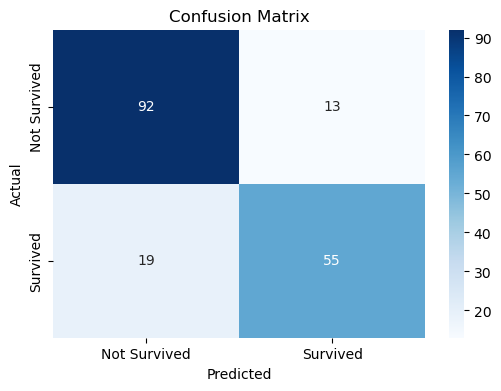

In [85]:
# 计算混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)  # 计算混淆矩阵

# 可视化混淆矩阵
plt.figure(figsize=(6, 4))  # 设置画布大小
sns.heatmap(
    conf_matrix,              # 输入的矩阵数据，通常是混淆矩阵
    annot=True,               # 在每个格子内显示数据值
    fmt=".0f",                  # 格式化显示的数值类型，".0f" 表示以整数格式显示
    cmap="Blues",             # 设置颜色映射，"Blues" 是一种蓝色渐变的配色方案
    xticklabels=["Not Survived", "Survived"],  # 设置 x 轴的标签，即预测类别
    yticklabels=["Not Survived", "Survived"]   # 设置 y 轴的标签，即真实类别
)

# 设置图形标题和标签
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()  # 显示图形

#### `None`：返回每个类别的召回率

In [86]:
# 分别返回类别0、类别1的召回率
recall_score(y_test, y_pred, average=None) 

array([0.87619048, 0.74324324])

In [87]:
# 类别0的召回率，此时认为类别0为正类：TP_0=92，FN_0=13
92/(92+13)

0.8761904761904762

In [88]:
# 类别1的召回率，此时认为类别1为正类:TP_1=55，FN_1=19
55/(55+19)

0.7432432432432432

#### `binary`：适用于二分类问题，计算正类（pos_label）的召回率

In [89]:
# 默认类别1为正类，因此返回类别1的召回率
recall_score(y_test, y_pred, average='binary') 

0.7432432432432432

#### `micro`：计算全局微观召回率（即把所有类别的 TP 和 FN 加起来计算）

In [90]:
# 全局微观召回率
recall_score(y_test, y_pred, average='micro') 

0.8212290502793296

In [91]:
# 全局召回率，即把所有类别的 TP 和 FN 加起来计算：（TP_0+TP_1）/(TP_0+TP_1+FN_0+FN_1)
(92+55)/(92+55+13+19)

0.8212290502793296

#### `macro`：计算各类别的召回率，并返回它们的简单平均值（不考虑类别的支持度）

In [92]:
# 全局宏观召回率
recall_score(y_test, y_pred, average='macro') 

0.8097168597168597

In [93]:
# 计算各类别召回率的平均值
np.mean([0.87619048, 0.74324324])

0.80971686

#### `weighted`：计算各类别的召回率，并根据每个类别的样本数加权平均

In [94]:
# 全局加权召回率
recall_score(y_test, y_pred, average='weighted')

0.8212290502793296

In [95]:
# 统计各类别的样本数
pd.DataFrame(y_test).value_counts()

survived
0           105
1            74
Name: count, dtype: int64

In [96]:
# 据各类别的样本数加权计算得到全局加权召回率
(0.87619048*105 + 0.74324324*74)/(105+74)

0.8212290511731845

# F1-score

## 基本概念

**F1-score**是精确率（Precision）和召回率（Recall）的调和平均数，旨在平衡这两个指标。公式为：
$$\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}$$
其中，
- Precision（精确率）：模型预测为正类的样本中，有多少比例是真正的正类。公式为：
$$\text{Precision} = \frac{TP}{TP + FP}$$
- Recall（召回率）：所有真实正类样本中，模型成功预测为正类的比例。公式为：
$$\text{Recall} = \frac{TP}{TP + FN}$$

- TP（True Positives）是真正例，也即真实为正类且预测为正类的样本数。
- FP（False Positives）是假正例，也即真实为负类但预测为正类的样本数。
- FN（False Negatives）是假负例，也即真实为正类但预测为负类的样本数。

## F1-score手算案例

沿用1.2节案例，已经计算得到

| 指标 | 数量 |
|------|------|
| **TP** | 3 |
| **TN** | 3 |
| **FP** | 2 |
| **FN** | 2 |

因此

$$\text{F1-score} = 2 \times \frac{\text{Precision} \times \text{Recall}}{\text{Precision} + \text{Recall}}=2 \times \frac{0.6 \times 0.6}{0.6 + 0.6} = 0.6$$

## sklearn计算F1-score

### F1-score
- `y_true`: 真实标签。
- `y_pred`: 模型预测结果。
- `pos_label`: 指定正类标签。
- `average`: F1-score汇总方式：
    - `None`：返回每个类别的F1-score。
    - `binary`：适用于二分类问题，计算正类（pos_label）的F1-score。
    - `micro`：计算全局微观F1-score（根据全局微观精确率、全局微观召回率计算得到）。
    - `macro`：计算各类别的F1-score，并返回它们的简单平均值（不考虑类别的支持度）。
    - `weighted`：计算各类别的F1-score，并根据每个类别的样本数加权平均。

### 实际案例

In [97]:
# 导入所需的库
import seaborn as sns  # 用于加载内置数据集
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score  # 用于计算准确率、精确率、召回率和F1-score

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 选择特征列（X）和目标列（y）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()  # 删除任何包含缺失值的行
y = df['survived']  # 目标变量，是否生还

# 数据集划分：80%作为训练集，20%作为验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练一个随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators表示使用100个决策树
model.fit(X_train, y_train)  # 训练模型

# 使用训练好的模型对验证集进行预测
y_pred = model.predict(X_test)

# 计算并打印模型在验证集上的准确率
accuracy = accuracy_score(y_test, y_pred)  # 计算准确率
print(f"Accuracy: {accuracy:.4f}")  # 输出准确率，保留四位小数

# 计算并打印模型在验证集上的精确率
precision = precision_score(y_test, y_pred)  # 计算精确率
print(f"Precision: {precision:.4f}")  # 输出精确率，保留四位小数

# 计算并打印模型在验证集上的召回率
recall = recall_score(y_test, y_pred)  # 计算召回率
print(f"Recall: {recall:.4f}")  # 输出召回率，保留四位小数

# 计算并打印模型在验证集上的F1-score
f1 = f1_score(y_test, y_pred)  # 计算F1-score
print(f"F1-score: {f1:.4f}")  # 输出F1-score，保留四位小数

Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1-score: 0.7746


### `average` F1-score汇总方式介绍

#### `None`：返回每个类别的F1-score

In [103]:
# 分别返回类别0、类别1的F1-score
f1_score(y_test, y_pred, average=None)

array([0.85185185, 0.77464789])

In [99]:
# 类别0、类别1的精确率
precision_score(y_test, y_pred, average=None) 

array([0.82882883, 0.80882353])

In [100]:
# 类别0、类别1的召回率
recall_score(y_test, y_pred, average=None) 

array([0.87619048, 0.74324324])

In [101]:
# 类别0的F1-score
2*(0.82882883*0.87619048)/(0.82882883+0.87619048)

0.8518518542708333

In [102]:
# 类别1的F1-score
2*(0.80882353*0.74324324)/(0.80882353+0.74324324)

0.774647885832176

#### `binary`：适用于二分类问题，计算正类（pos_label）的F1-score

In [104]:
# 默认类别1为正类，因此返回类别1的F1-score
f1_score(y_test, y_pred, average='binary')

0.7746478873239436

#### `micro`：计算全局微观F1-score（根据全局微观精确率、全局微观召回率计算得到）

In [105]:
# 全局微观F1-score
f1_score(y_test, y_pred, average='micro') 

0.8212290502793296

In [106]:
# 全局微观精确率
precision_score(y_test, y_pred, average='micro') 

0.8212290502793296

In [107]:
# 全局微观召回率
recall_score(y_test, y_pred, average='micro') 

0.8212290502793296

In [108]:
# 全局微观F1-score
2*(0.8212290502793296*0.8212290502793296)/(0.8212290502793296+0.8212290502793296)

0.8212290502793297

#### `macro`：计算各类别的F1-score，并返回它们的简单平均值（不考虑类别的支持度）

In [109]:
# 全局宏观F1-score
f1_score(y_test, y_pred, average='macro') 

0.8132498695878978

In [110]:
# 计算各类别F1-score的平均值
np.mean([0.85185185, 0.77464789])

0.8132498699999999

#### `weighted`：计算各类别的F1-score，并根据每个类别的样本数加权平均

In [111]:
# 全局加权F1-score
f1_score(y_test, y_pred, average='weighted')

0.8199351290861244

In [112]:
# 统计各类别的样本数
pd.DataFrame(y_test).value_counts()

survived
0           105
1            74
Name: count, dtype: int64

In [113]:
# 根据各类别的样本数加权计算得到全局加权F1-score
(0.85185185*105 + 0.77464789*74)/(105+74)

0.8199351291061452

# 分类报告

## 基本概念

**分类报告（Classification Report）**用于报告分类模型的效果指标，主要包含以下几个重要的指标：精确率（Precision）、召回率（Recall）、F1 分数（F1 Score） 和 支持度（Support）。

## sklearn计算分类报告

### classification_report
- `y_true`: 真实标签。
- `y_pred`: 模型预测结果。
- `labels`: 指定混淆矩阵中的类别顺序。
- `target_names`: 设置标签的名字。
- `digits`: 设置报告中显示的小数点位数。默认为 2，表示结果保留两位小数。
- `output_dict`: 函数是否返回字典。
    - True: 函数返回字典，字典包含每个类别的详细性能指标。
    - False: 函数返回字符串报告。

### 实际案例

Accuracy: 0.8212
Precision: 0.8088
Recall: 0.7432
F1-Score: 0.7746
Confusion Matrix:
[[92 13]
 [19 55]]


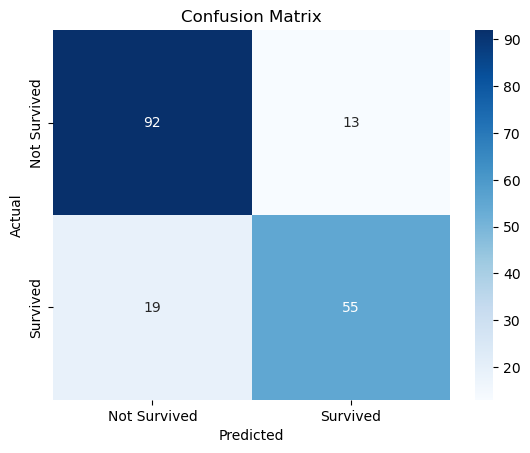

Classification Report:
              precision    recall  f1-score   support

           0     0.8288    0.8762    0.8519       105
           1     0.8088    0.7432    0.7746        74

    accuracy                         0.8212       179
   macro avg     0.8188    0.8097    0.8132       179
weighted avg     0.8206    0.8212    0.8199       179



In [114]:
import seaborn as sns  # 用于加载内置数据集
import warnings  # 用于忽略警告信息
warnings.filterwarnings('ignore')  # 忽略警告信息，防止冗长的警告输出
from sklearn.ensemble import RandomForestClassifier  # 随机森林分类器
from sklearn.model_selection import train_test_split  # 数据集划分工具
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report  # 用于计算评估指标

# 加载seaborn内置的泰坦尼克数据集
df = sns.load_dataset('titanic')

# 填充 'age' 列的缺失值：使用该列的中位数填充缺失值
df['age'].fillna(df['age'].median(), inplace=True)
# 填充 'embarked' 列的缺失值：使用该列的众数填充缺失值
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)
# 将 'sex' 列转化为数值：'male' 映射为 1，'female' 映射为 0
df['sex'] = df['sex'].map({'male': 1, 'female': 0})
# 将 'embarked' 列转化为数值：'C' 映射为 0，'Q' 映射为 1，'S' 映射为 2
df['embarked'] = df['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

# 选择特征列（X）和目标列（y）
X = df[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']].dropna()  # 删除任何包含缺失值的行
y = df['survived']  # 目标变量，是否生还

# 数据集划分：80%作为训练集，20%作为验证集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 创建并训练一个随机森林模型
model = RandomForestClassifier(n_estimators=100, random_state=42)  # n_estimators表示使用100个决策树
model.fit(X_train, y_train)  # 训练模型

# 使用训练好的模型对验证集进行预测
y_pred = model.predict(X_test)

# 计算并打印模型在验证集上的准确率
accuracy = accuracy_score(y_test, y_pred)  # 计算准确率
print(f"Accuracy: {accuracy:.4f}")  # 输出准确率，保留四位小数

# 计算并打印模型在验证集上的精确率
precision = precision_score(y_test, y_pred)  # 计算精确率
print(f"Precision: {precision:.4f}")  # 输出精确率，保留四位小数

# 计算并打印模型在验证集上的召回率
recall = recall_score(y_test, y_pred)  # 计算召回率
print(f"Recall: {recall:.4f}")  # 输出召回率，保留四位小数

# 计算并打印模型在验证集上的F1-score
f1 = f1_score(y_test, y_pred)  # 计算F1-score
print(f"F1-Score: {f1:.4f}")  # 输出F1-score，保留四位小数

# 计算并打印混淆矩阵
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# 可视化混淆矩阵
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# 计算并打印分类报告
report = classification_report(y_test, y_pred, digits=4)
print("Classification Report:")
print(report)

In [47]:
# 分别返回类别0、类别1的精确率
precision_score(y_test, y_pred, average=None) 

array([0.82882883, 0.80882353])

In [115]:
# 分别返回类别0、类别1的召回率
recall_score(y_test, y_pred, average=None) 

array([0.87619048, 0.74324324])

In [116]:
# 分别返回类别0、类别1的F1-score
f1_score(y_test, y_pred, average=None)

array([0.85185185, 0.77464789])

In [117]:
# 统计各类别的样本数
pd.DataFrame(y_test).value_counts()

survived
0           105
1            74
Name: count, dtype: int64

In [119]:
# 计算准确率
accuracy_score(y_test, y_pred)  

0.8212290502793296

In [123]:
# 全局宏观精确率
# 计算各类别的精确率，并返回它们的简单平均值（不考虑类别的支持度）
precision_score(y_test, y_pred, average='macro') 

0.8188261791202968

In [124]:
# 全局宏观召回率
# 计算各类别的召回率，并返回它们的简单平均值（不考虑类别的支持度）
recall_score(y_test, y_pred, average='macro') 

0.8097168597168597

In [125]:
# 全局宏观F1-score
# 计算各类别的F1-score，并返回它们的简单平均值（不考虑类别的支持度）
f1_score(y_test, y_pred, average='macro') 

0.8132498695878978

In [126]:
# 全局加权精确率
# 计算各类别的精确率，并根据每个类别的样本数加权平均
precision_score(y_test, y_pred, average='weighted') 

0.8205584815837855

In [127]:
# 全局加权召回率
# 计算各类别的召回率，并返回它们的简单平均值（不考虑类别的支持度）
recall_score(y_test, y_pred, average='weighted')

0.8212290502793296

In [128]:
# 全局加权F1-score
# 计算各类别的F1-score，并根据每个类别的样本数加权平均
f1_score(y_test, y_pred, average='weighted')

0.8199351290861244